<a href="https://colab.research.google.com/github/SouLucasCardoso/GlicoML/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### IMPORTANDO BIBLIOTECAS


In [29]:
# 1) Bibliotecas básicas
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e modelos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#### FAZENDO UPLOAD DO ARQUIVO

In [30]:
from google.colab import files

# Abre janela pra você subir o arquivo .csv
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


#### LEITURA E DEFINIÇÃO DO DATASET

In [31]:
import io

df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### VISAO GERAL DATASET


In [32]:
# Dimensão do dataset
print("Formato do dataset:", df.shape)

# Primeiras linhas
df.head()


Formato do dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
# Informações gerais
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
# Estatísticas descritivas
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
# Verificando valores nulos
df.isna().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [36]:
# Distribuição da variável alvo
df['Outcome'].value_counts(normalize=True)


,proportion
Outcome,
0,0.651042
1,0.348958


#### PEQUENAS VISUALIZAÇÕES

HISTOGRAMA E MAPA DE CORRELAÇÃO

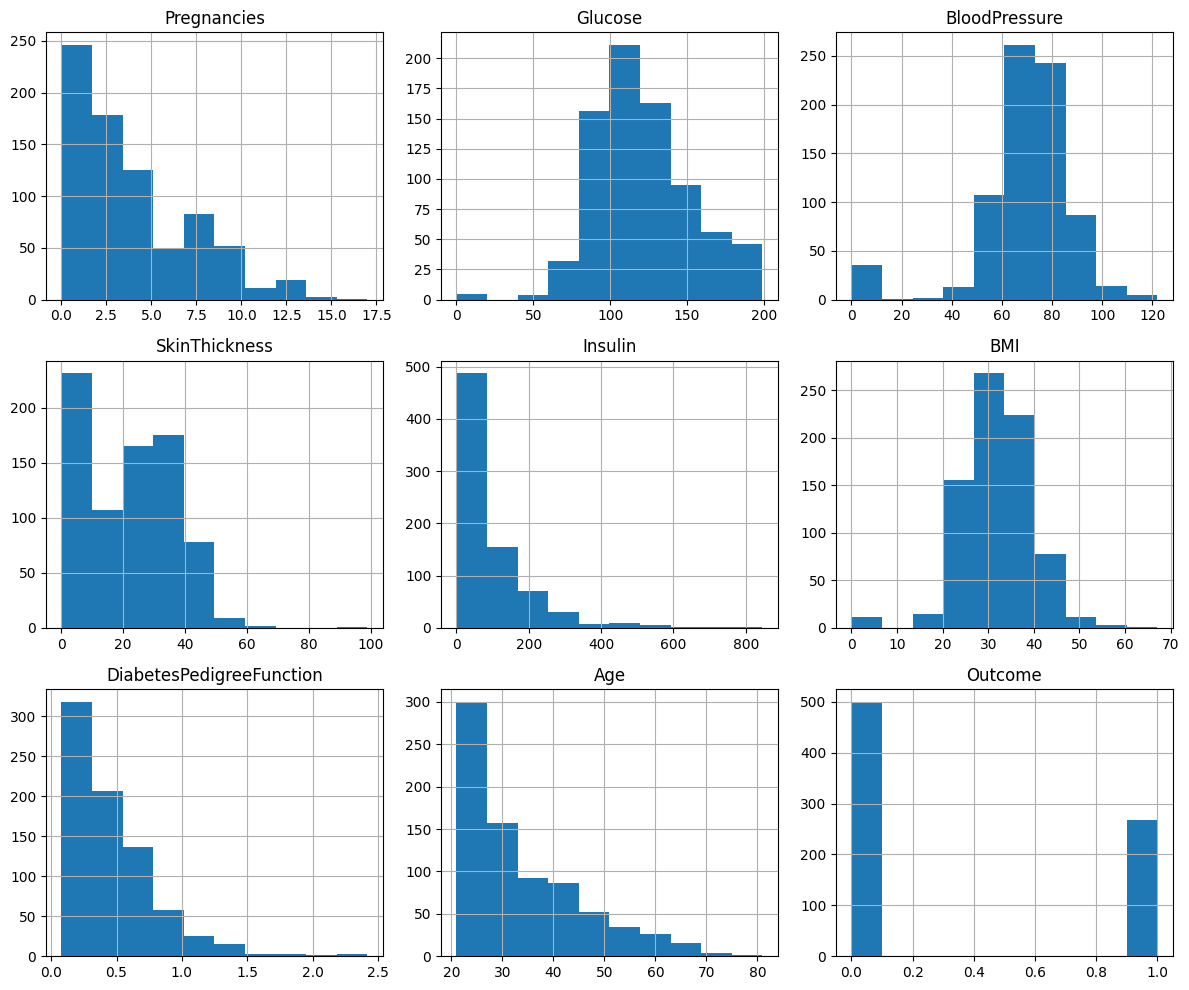

In [37]:
# Histograma de todas as features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


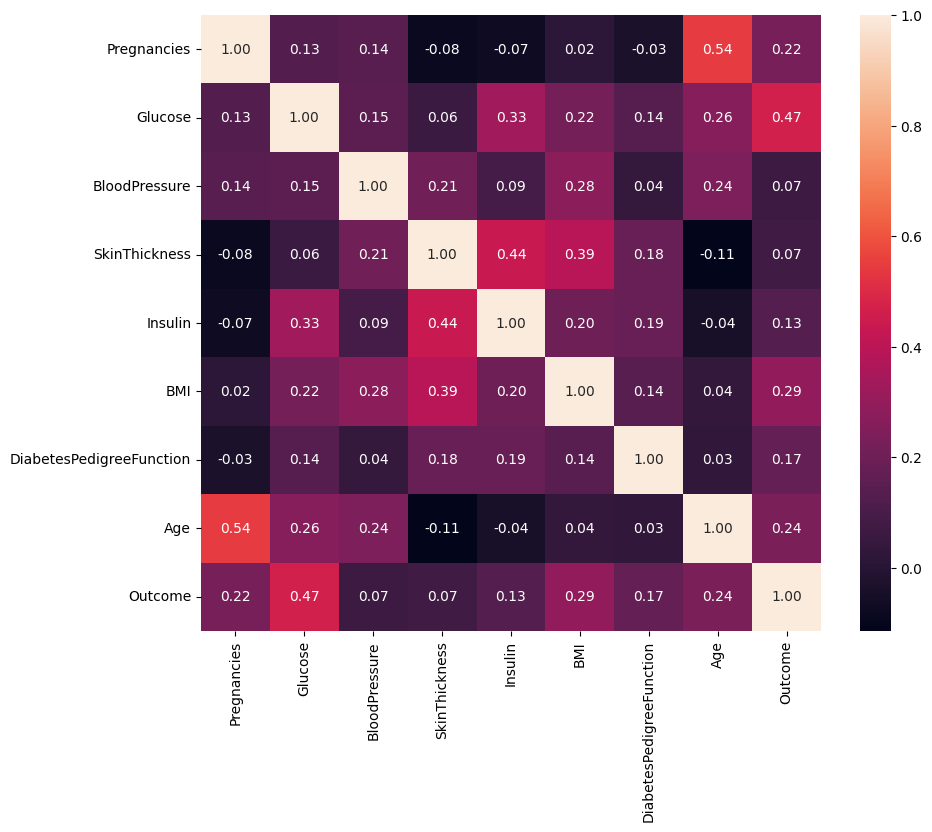

In [38]:
# Mapa de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()


#### SEPARANDO X e Y - FAZENDO TRAIN/TEST SPLIT

In [39]:
# Supondo que a coluna alvo é 'Outcome'
target_col = 'Outcome'

X = df.drop(columns=[target_col])
y = df[target_col]

# Divisão treino/teste (70/30 por exemplo)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((537, 8), (231, 8))

#### ESCALONAMENTO

pra SVM, KNN, LR.

In [40]:
scaler = StandardScaler()

# Ajusta no treino e transforma treino e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### TREINAMENTO DE MODELO

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

def treinar_avaliar_modelo(nome_modelo, modelo, X_train, y_train, X_test, y_test):
    # Treino
    modelo.fit(X_train, y_train)

    # Predição
    y_pred = modelo.predict(X_test)

    # Métricas básicas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n===== {nome_modelo} =====")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

    return {
        "modelo": nome_modelo,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1
    }


##### REGRESSÃO LOGISTICA


===== Logistic Regression =====
Accuracy : 0.7445887445887446
Precision: 0.6774193548387096
Recall   : 0.5185185185185185
F1-score : 0.5874125874125874

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231



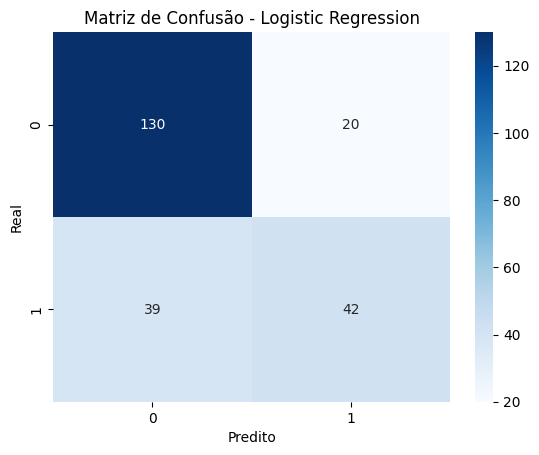

In [42]:
lr = LogisticRegression(max_iter=1000)
result_lr = treinar_avaliar_modelo(
    "Logistic Regression",
    lr,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)


##### SVM


===== SVM =====
Accuracy : 0.7532467532467533
Precision: 0.6875
Recall   : 0.5432098765432098
F1-score : 0.6068965517241379

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.54      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.75       231



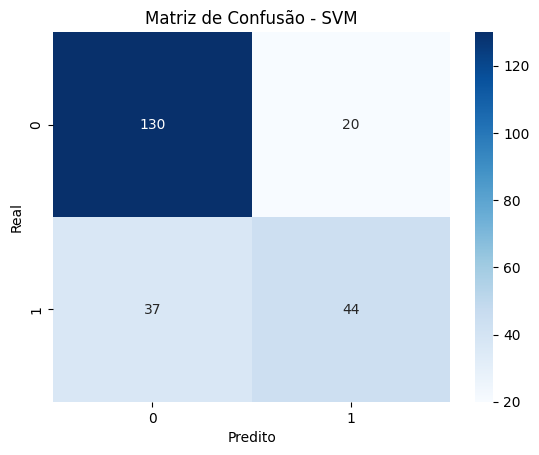

In [43]:
svm = SVC(kernel='rbf', probability=True)
result_svm = treinar_avaliar_modelo(
    "SVM",
    svm,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)


##### NAIVE BAYES


===== Naive Bayes =====
Accuracy : 0.7445887445887446
Precision: 0.6410256410256411
Recall   : 0.6172839506172839
F1-score : 0.6289308176100629

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       150
           1       0.64      0.62      0.63        81

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



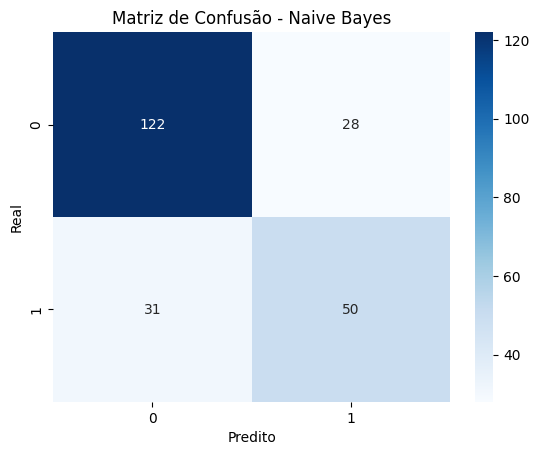

In [44]:
nb = GaussianNB()
result_nb = treinar_avaliar_modelo(
    "Naive Bayes",
    nb,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)


##### KNN


===== KNN =====
Accuracy : 0.7142857142857143
Precision: 0.6153846153846154
Recall   : 0.49382716049382713
F1-score : 0.547945205479452

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       150
           1       0.62      0.49      0.55        81

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.71       231



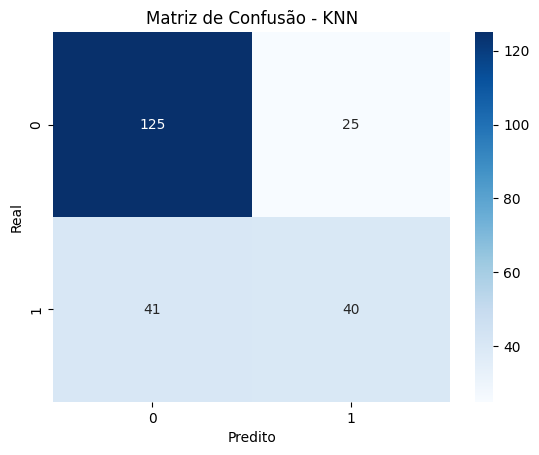

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
result_knn = treinar_avaliar_modelo(
    "KNN",
    knn,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)


##### ARVORE DE DECISÃO


===== Decision Tree =====
Accuracy : 0.7619047619047619
Precision: 0.703125
Recall   : 0.5555555555555556
F1-score : 0.6206896551724138

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       150
           1       0.70      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



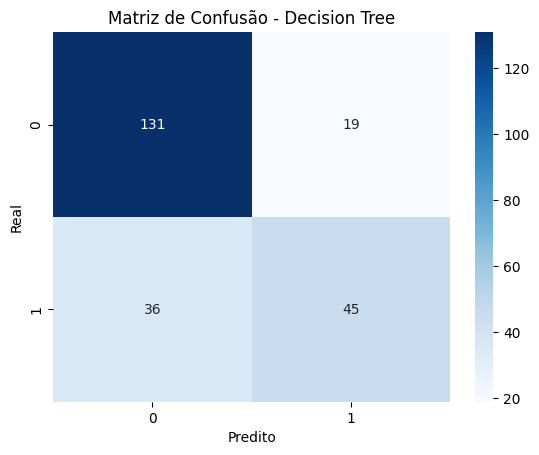

In [46]:
dt = DecisionTreeClassifier(random_state=42)
result_dt = treinar_avaliar_modelo(
    "Decision Tree",
    dt,
    X_train, y_train,      # sem scaler
    X_test, y_test
)


#### RANDOM FOREST


===== Random Forest =====
Accuracy : 0.7489177489177489
Precision: 0.6825396825396826
Recall   : 0.5308641975308642
F1-score : 0.5972222222222222

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



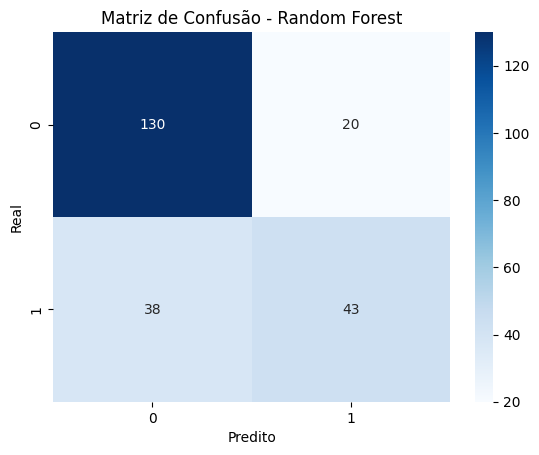

In [47]:
rf = RandomForestClassifier(random_state=42)

result_rf = treinar_avaliar_modelo(
    "Random Forest",
    rf,
    X_train, y_train,
    X_test, y_test
)

#### COMPARAÇÃO DE MODELOS

In [48]:
resultados = pd.DataFrame([
    result_lr,
    result_svm,
    result_nb,
    result_knn,
    result_dt,
    result_rf
])

resultados


,modelo,accuracy,precision,recall,f1
0,Logistic Regression,0.744589,0.677419,0.518519,0.587413
1,SVM,0.753247,0.687500,0.543210,0.606897
2,Naive Bayes,0.744589,0.641026,0.617284,0.628931
3,KNN,0.714286,0.615385,0.493827,0.547945
4,Decision Tree,0.761905,0.703125,0.555556,0.620690
5,Random Forest,0.748918,0.682540,0.530864,0.597222


In [49]:
resultados.sort_values(by="f1", ascending=False)


,modelo,accuracy,precision,recall,f1
2,Naive Bayes,0.744589,0.641026,0.617284,0.628931
4,Decision Tree,0.761905,0.703125,0.555556,0.620690
1,SVM,0.753247,0.687500,0.543210,0.606897
5,Random Forest,0.748918,0.682540,0.530864,0.597222
0,Logistic Regression,0.744589,0.677419,0.518519,0.587413
3,KNN,0.714286,0.615385,0.493827,0.547945


#### PLOTANDO A CURVA ROC COMPARATIVA

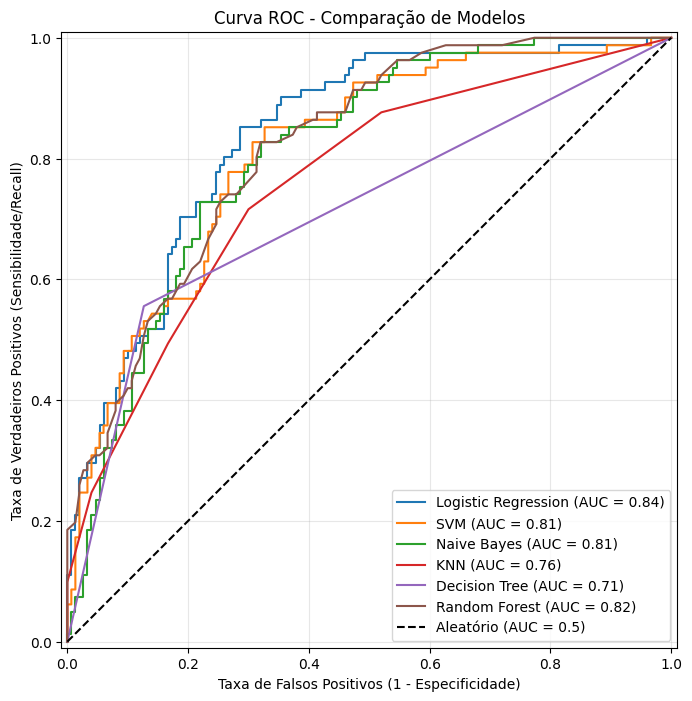

In [50]:
fig, ax = plt.subplots(figsize=(10, 8))

modelos_para_plotar = [
    ("Logistic Regression", lr, X_test_scaled),
    ("SVM", svm, X_test_scaled),
    ("Naive Bayes", nb, X_test_scaled),
    ("KNN", knn, X_test_scaled),
    ("Decision Tree", dt, X_test),
    ("Random Forest", rf, X_test)
]

for nome, modelo, x_input in modelos_para_plotar:
    RocCurveDisplay.from_estimator(modelo, x_input, y_test, ax=ax, name=nome)

plt.plot([0, 1], [0, 1], "k--", label="Aleatório (AUC = 0.5)")

plt.title("Curva ROC - Comparação de Modelos")
plt.xlabel("Taxa de Falsos Positivos (1 - Especificidade)")
plt.ylabel("Taxa de Verdadeiros Positivos (Sensibilidade/Recall)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()